# Restaurant Price Prediction

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

## Load Data

In [2]:
data = pd.read_csv("./train.csv")

In [3]:
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [4]:
data['Opening Date'] = pd.to_datetime(data['Open Date'])
data['Close'] = pd.DataFrame(['19/06/2023']*data.shape[0])
data['Close'] = pd.to_datetime(data['Close'], dayfirst = True)
data['No of days'] = (data['Close'] - data['Opening Date'])
data["No of days"] = data['No of days'].apply(lambda i: i.days)

In [5]:
data.drop(['Id', 'Open Date', 'Opening Date', 'Close'], axis = 1, inplace = True)

In [6]:
data.isnull().sum().any()

# No NULL values in the dataset.

False

## Visualization

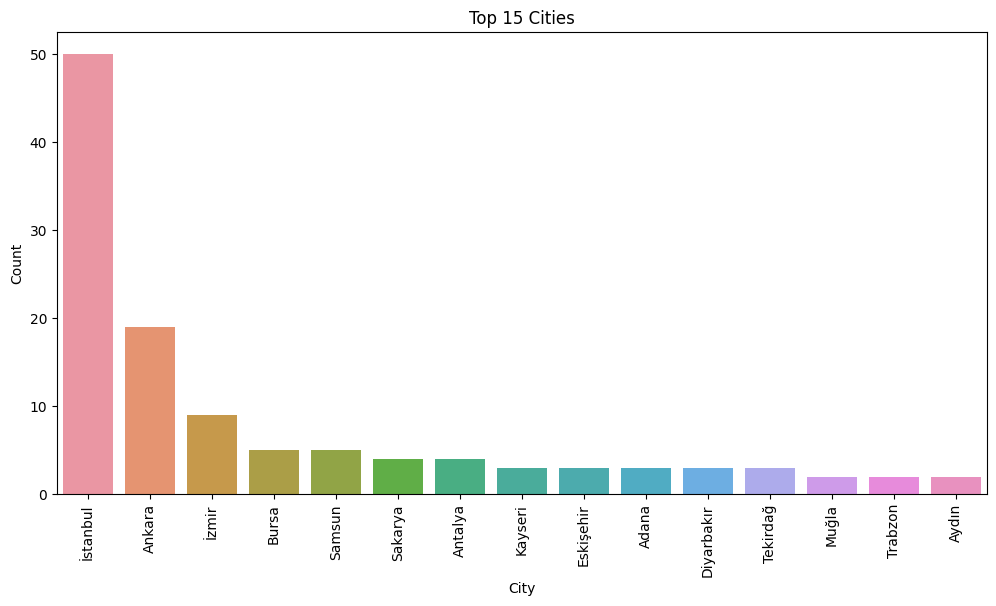

In [7]:
category_counts = data['City'].value_counts()
top_15_categories = category_counts.head(15)

plt.figure(figsize=(12, 6)) 
sns.countplot(data=data, x='City', order=top_15_categories.index)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Count') 
plt.title('Top 15 Cities')
plt.show()

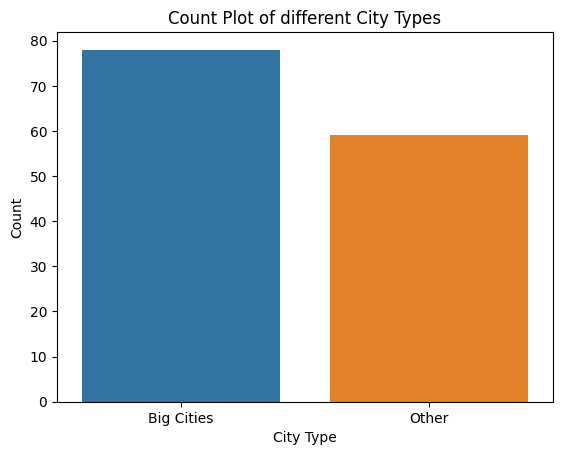

In [8]:
sns.countplot(data=data, x='City Group')
plt.xlabel('City Type')
plt.ylabel('Count') 
plt.title('Count Plot of different City Types')
plt.show()

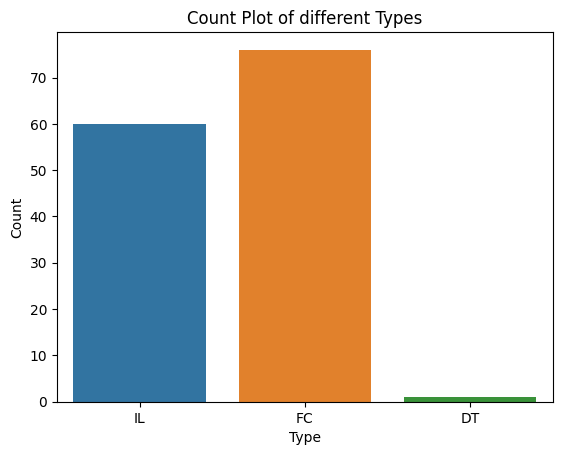

In [9]:
sns.countplot(data=data, x='Type')
plt.xlabel('Type')
plt.ylabel('Count') 
plt.title('Count Plot of different Types')
plt.show()

## Feature Engineering

In [10]:
#Encoding

label_encoder = LabelEncoder()
encoder_columns = ['City','City Group','Type']
for column in encoder_columns:
    encoded_values = label_encoder.fit_transform(data[column])
    data[column] = encoded_values

In [11]:
scaler = StandardScaler()

column_to_exclude = 'revenue'
columns_to_scale = [col for col in data.columns if col != column_to_exclude]
scaler.fit(data[columns_to_scale])
data_scaled = scaler.transform(data[columns_to_scale])
data[columns_to_scale] = data_scaled

## Modelling

### Simple Linear Regression Model

In [12]:
lr_model = LinearRegression()

X = np.array(data['City'])
y = np.array(data['revenue'])

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
lr_model.fit(X_train,y_train)

LinearRegression()

In [13]:
print('Train',lr_model.score(X_train,y_train),'\nTest:',lr_model.score(X_test,y_test))

Train 0.06111218455498635 
Test: 0.0441090925448443


### Multiple Linear Regression Model

In [14]:
mlr_model = LinearRegression()
X = np.array(data.drop(['revenue'],axis=1))
y = np.array(data['revenue'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

mlr_model.fit(X_train,y_train)

LinearRegression()

In [15]:
print('Train',mlr_model.score(X_train,y_train),'\nTest:',mlr_model.score(X_test,y_test))

Train 0.4945849099725874 
Test: -0.7389116697079092


### Polynomial Regression

In [16]:
degree=4
X = np.array(data['City'])
y = np.array(data['revenue'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [17]:
print('Train',polyreg.score(X_train,y_train),'\nTest:',polyreg.score(X_test,y_test))

Train 0.11113652986118239 
Test: 0.10626129427284459


### Decision Trees

In [18]:
X = np.array(data.drop(['revenue'],axis=1))
y = np.array(data['revenue'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = X_train
dt = DecisionTreeRegressor(max_depth=2)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [19]:
print('Train',dt.score(X_train,y_train),'\nTest:',dt.score(X_test,y_test))

Train 0.36756396218473575 
Test: 0.07380691499771863


### Random Forest Regression

In [20]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [21]:
print('Train',rf.score(X_train,y_train),'\nTest:',rf.score(X_test,y_test))

Train 0.850014574877715 
Test: 0.14691784173889855


#### Feature Importance 

In [22]:
importance_scores = rf.feature_importances_

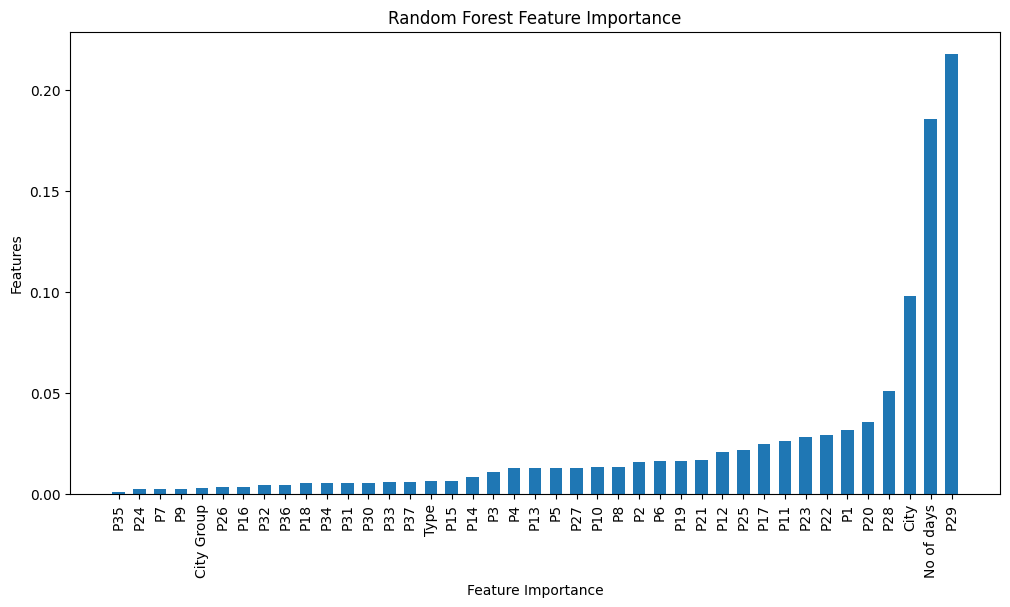

In [23]:
feature_names = list(data.columns)
feature_names.remove('revenue')
sorted_indices = np.argsort(importance_scores)
sorted_scores = importance_scores[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

plt.figure(figsize=(12, 6))

plt.bar(range(len(importance_scores)), sorted_scores, tick_label=sorted_feature_names, width = 0.6)
plt.xlabel('Feature Importance')
plt.xticks(rotation = 90)
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

## Performance Evaluations Table

|Name|Training|Testing|
|----|---------|------|
|Simple Linear Regression|06%|04%|
|Multiple Linear Regression|49%|-73%|
|Polynomial Regression|11%|11%|
|Decision Trees|37%|07%|
|Random Forest|85%|15%|